## seaborn 
#### seaborn is a library that uses Matplotlib underneath to plot graphs.
#### Matplotlib is a low level graph plotting library in python that serves as a visualization utility.
##### https://seaborn.pydata.org/tutorial.html

## barplot
**A bar plot or bar chart is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
%config InlineBackend.figure_format='retina'

In [5]:
url='https://github.com/mathawanup/learn_dataset/raw/master/car_mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


<AxesSubplot:xlabel='gear', ylabel='cty'>

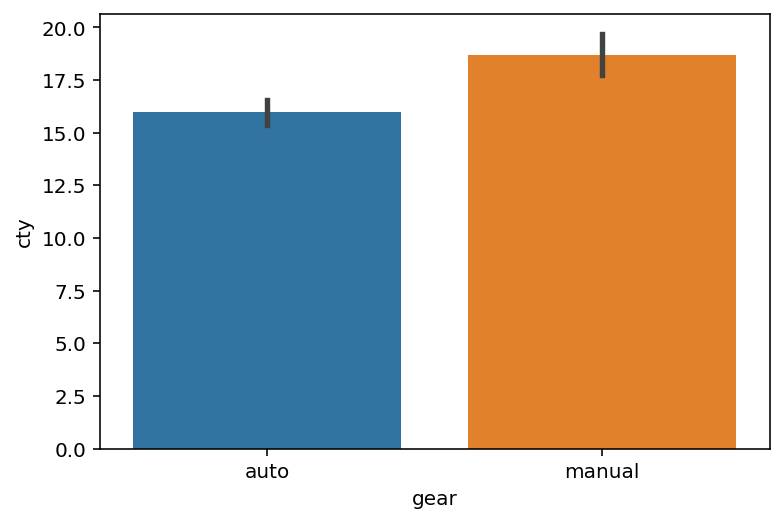

In [6]:
# x เป็นข้อมูลที่ต่อกันเป็นอักษร 
# y เป็นข้อมูลตัวเลข
#เส้นสีดำ เรียกว่า error bar
sns.barplot(x='gear', y='cty', data=df) 

<AxesSubplot:xlabel='gear', ylabel='cty'>

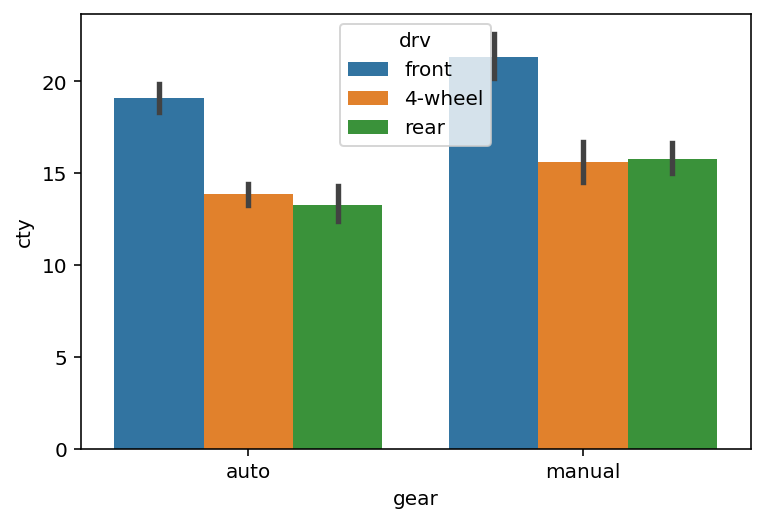

In [6]:
#เส่นสีดำ เรียกว่า error bar
sns.barplot(x='gear', 
            y='cty', 
            data=df, 
            hue='drv'
           ) 

In [7]:
# describe() แสดงค่าทางสถิติ
df.groupby('drv')['cty'].describe() 

,count,mean,std,min,25%,50%,75%,max
drv,,,,,,,,
4-wheel,103.0,14.330097,2.874459,9.0,13.0,14.0,16.0,21.0
front,106.0,19.971698,3.626510,11.0,18.0,19.0,21.0,35.0
rear,25.0,14.080000,2.215852,11.0,12.0,15.0,15.0,18.0


<AxesSubplot:xlabel='drv', ylabel='cty'>

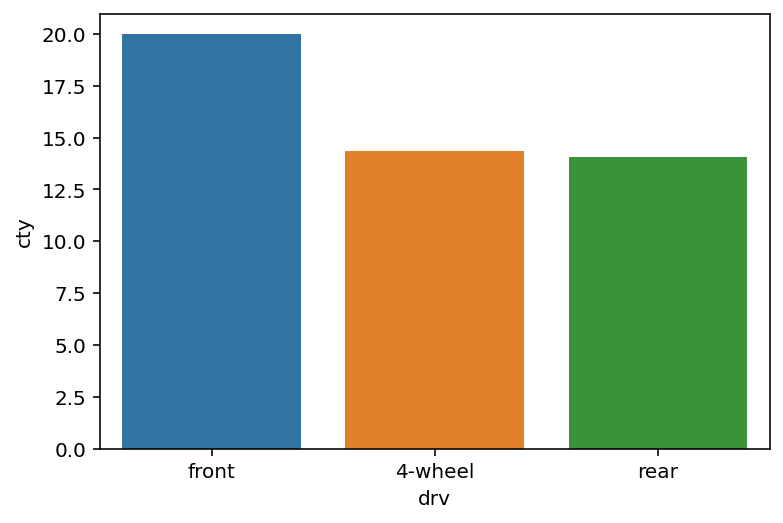

In [9]:
# ci=None ลบ error bar
sns.barplot(x='drv', 
            y='cty', 
            data=df,
            ci=None
           )  

<AxesSubplot:xlabel='drv', ylabel='cty'>

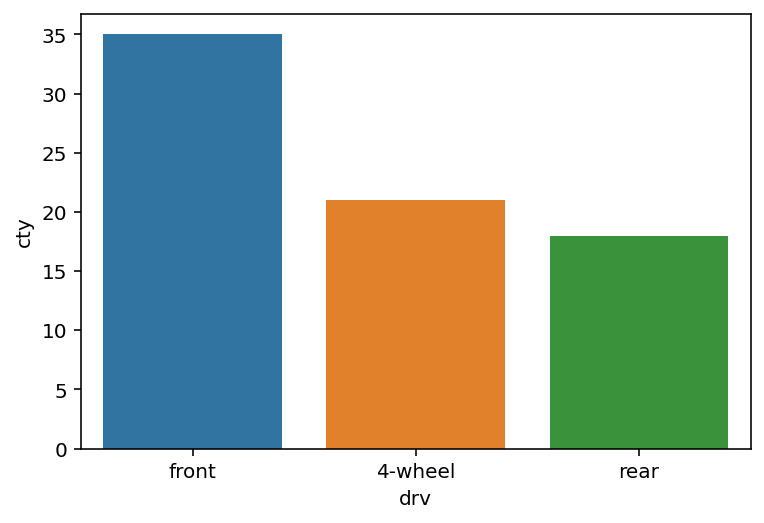

In [13]:
# estimator=max ปรับค่าแกน y ของ font
sns.barplot(x='drv', 
            y='cty', 
            data=df,
            ci=None,
            estimator=max,
           )  

<AxesSubplot:xlabel='drv', ylabel='cty'>

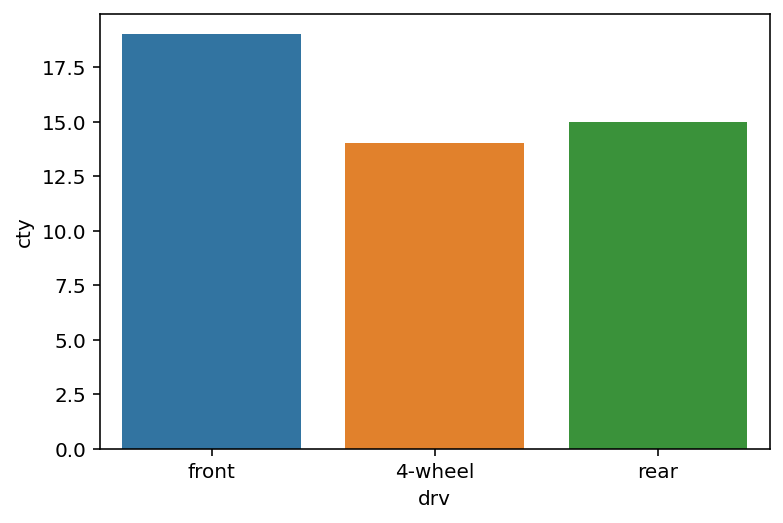

In [14]:
# estimator=median ปรับค่าแกรน y ของ font แต่ข้อมูลไม่มีใน discribe()
sns.barplot(x='drv', 
            y='cty', 
            data=df,
            ci=None,
            estimator=np.median,
           )  

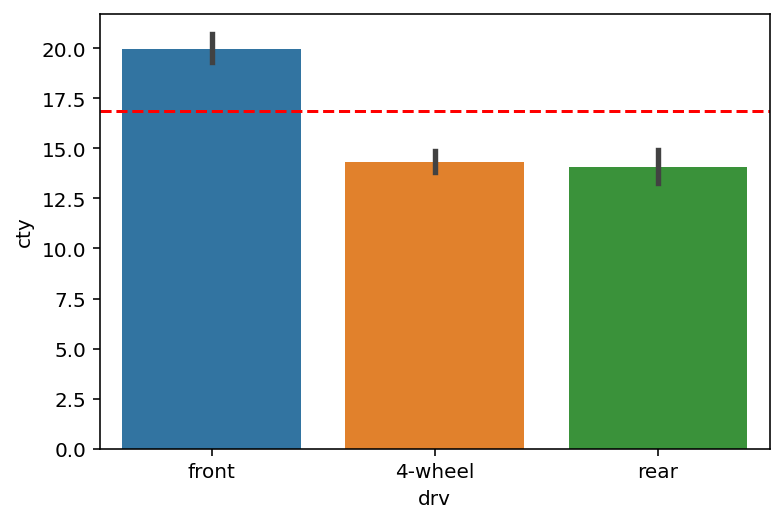

In [15]:
#สร้างเส้นประ สีแดง linestyle='--' axhline(axis horizonhal)
avg=df.cty.mean() 
sns.barplot(x='drv', y='cty', data=df)
plt.axhline(y=avg, color='red', linestyle='--')

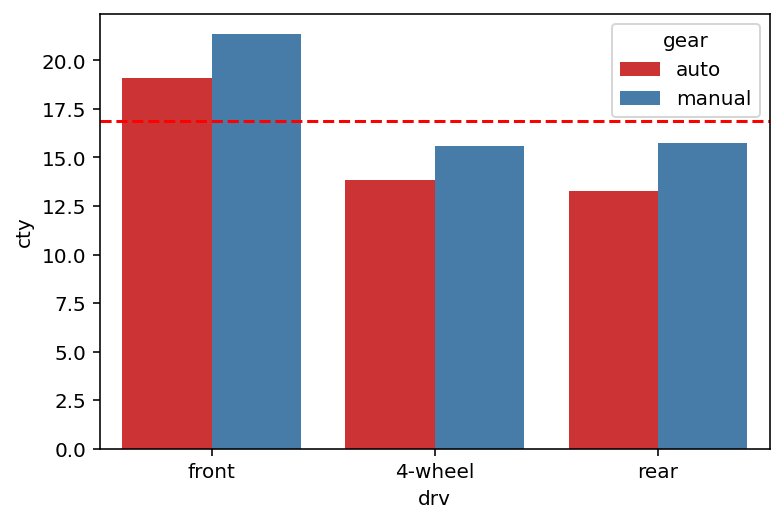

In [8]:
#กำหนดสี bar palette='Set1',
avg=df.cty.mean()
sns.barplot(x='drv', y='cty', data=df, 
            hue='gear',
            palette='Set1', 
            ci=None,
            ) 
plt.axhline(y=avg, color='red', linestyle='--')
# https://seaborn.pydata.org/generated/seaborn.color_palette.html

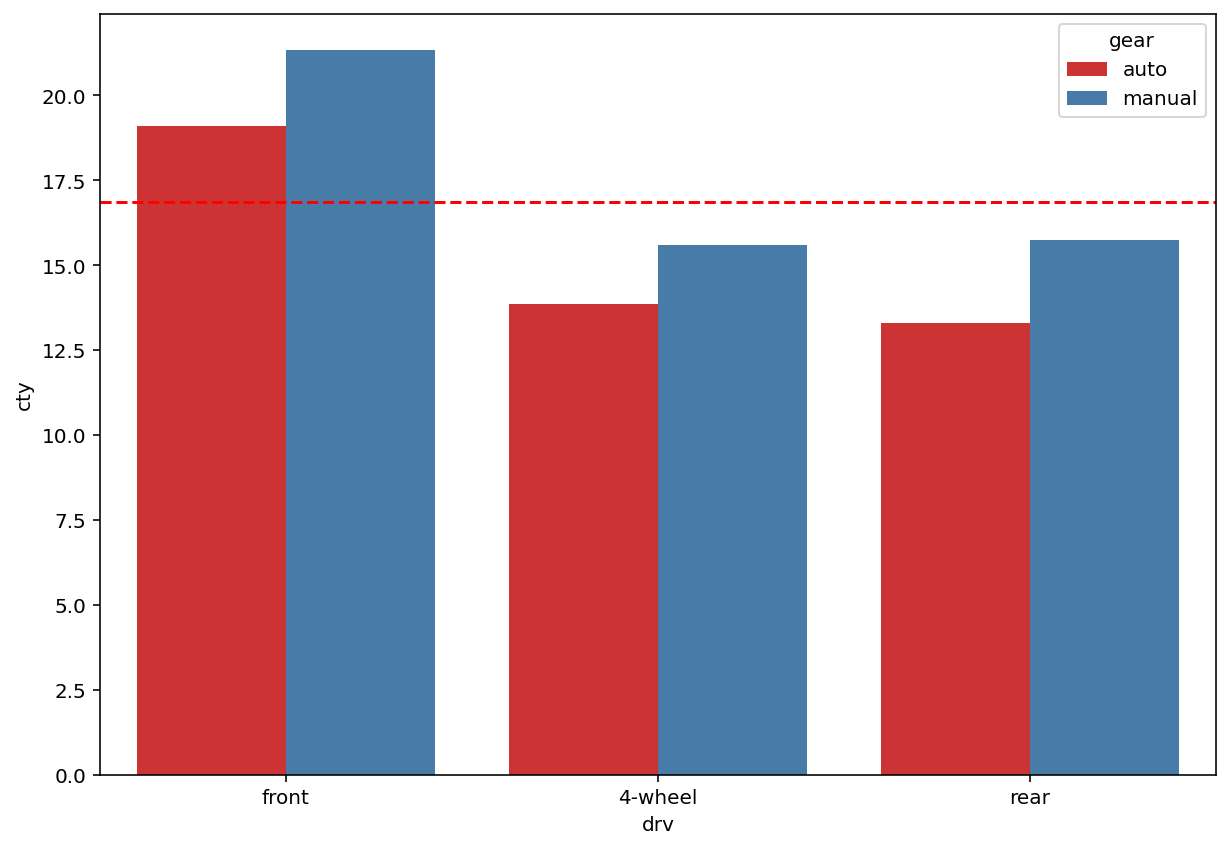

In [19]:
#ปรับขนาด bar
avg=df.cty.mean()
plt.figure(figsize=(10,7)) 
sns.barplot(x='drv', y='cty', data=df, 
            hue='gear',
            palette='Set1', 
            ci=None,
            )
plt.axhline(y=avg, color='red', linestyle='--')

<AxesSubplot:xlabel='drv', ylabel='cty'>

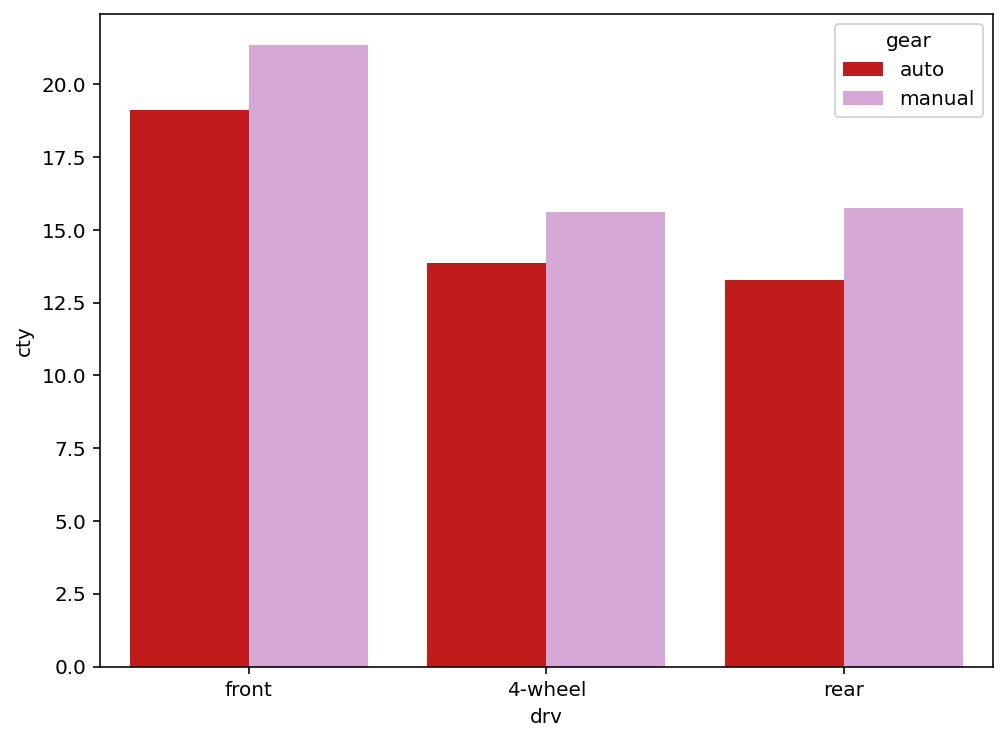

In [20]:
#กำหนดชื่อสี
plt.figure(figsize=(8,6))  
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', 
            ci=None,
            palette=['#dd0000', 'plum'])  # palette  https://matplotlib.org/3.1.0/gallery/color/named_colors.html


Text(0.5, 1.0, 'fuel efficiency by drive wheels')

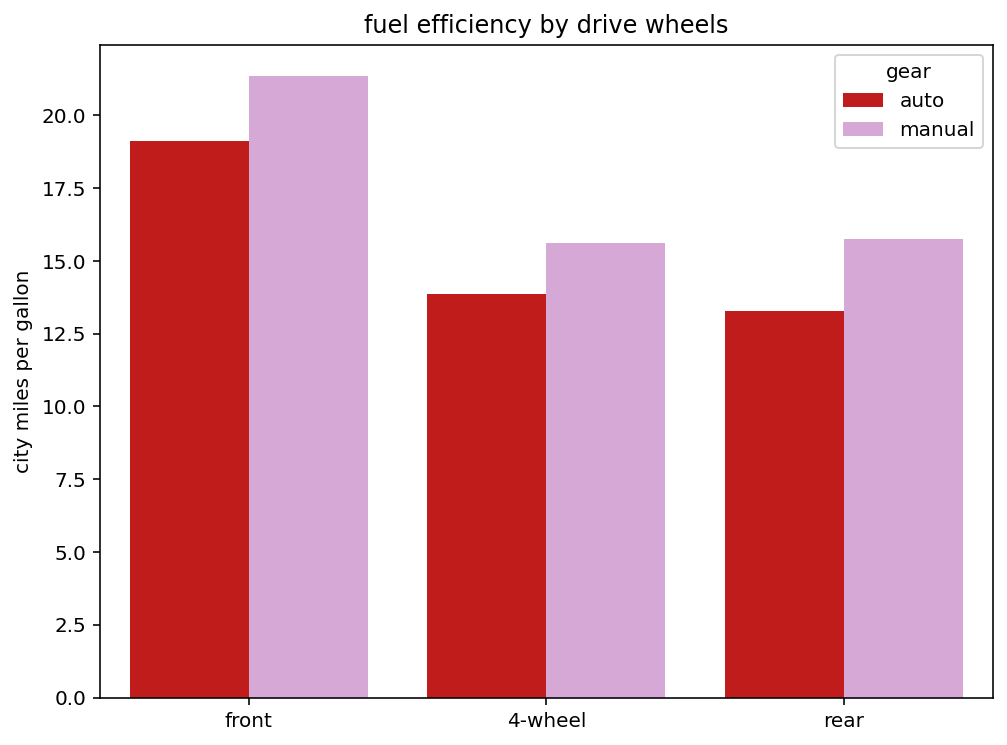

In [21]:
#เปลี่ยนชื่อ label
plt.figure(figsize=(8,6)) 
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', 
            ci=None,
            palette=['#dd0000', 'plum'])  # palette  https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.xlabel('')
plt.ylabel('city miles per gallon') 
plt.title('fuel efficiency by drive wheels') 

C:\Users\panuw\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


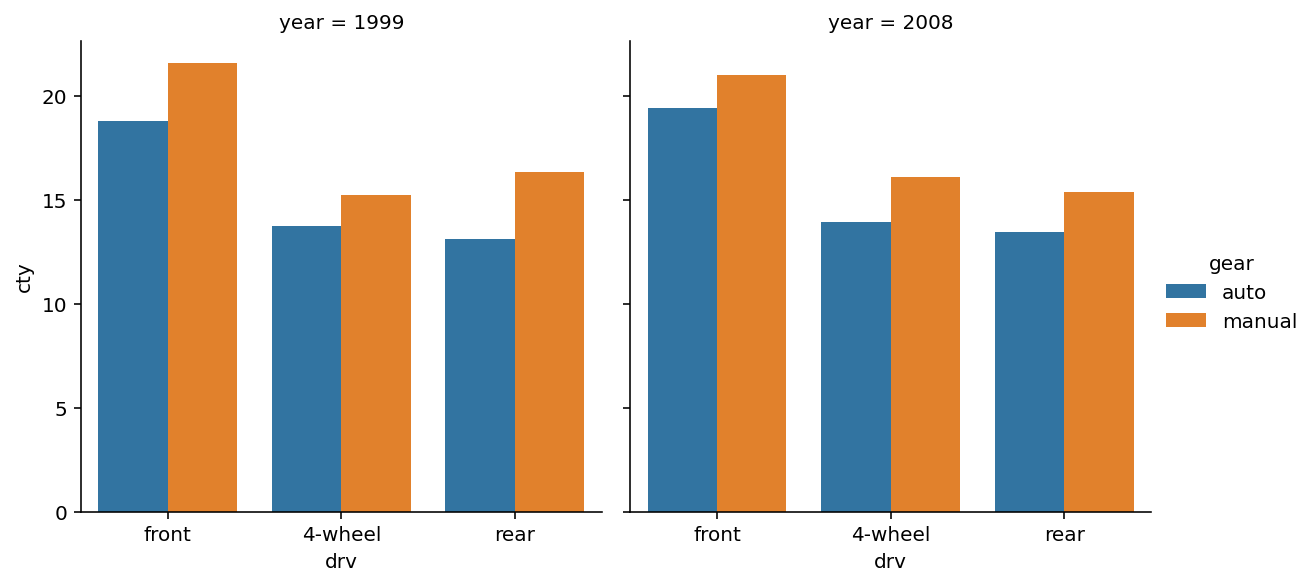

In [22]:
#เรียงกราฟตามปี
sns.factorplot(x='drv', y='cty', data=df,ci=None,
               hue="gear", 
               col="year",
               kind="bar",
               height=4, aspect=1);

In [23]:
#แสดง class ทั้งหมด
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [9]:
#แสดง class ที่กำหนด
df[df['class'].str.match('compact|suv|midsize')].sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
14,audi,a4 quattro,3.1,2008,6,manual(m6),4-wheel,15,25,p,compact,manual
134,lincoln,navigator 2wd,5.4,1999,8,auto(l4),rear,11,17,r,suv,auto
142,nissan,altima,2.4,1999,4,auto(l4),front,19,27,r,compact,auto
189,toyota,camry solara,2.4,2008,4,auto(s5),front,22,31,r,compact,auto
151,nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4-wheel,15,17,r,suv,manual
137,mercury,mountaineer 4wd,4.0,1999,6,auto(l5),4-wheel,14,17,r,suv,auto
171,subaru,impreza awd,2.5,2008,4,manual(m5),4-wheel,19,25,p,compact,manual
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4-wheel,11,14,e,suv,auto
129,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4-wheel,11,14,p,suv,auto
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),rear,13,17,r,suv,auto


C:\Users\jerap\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


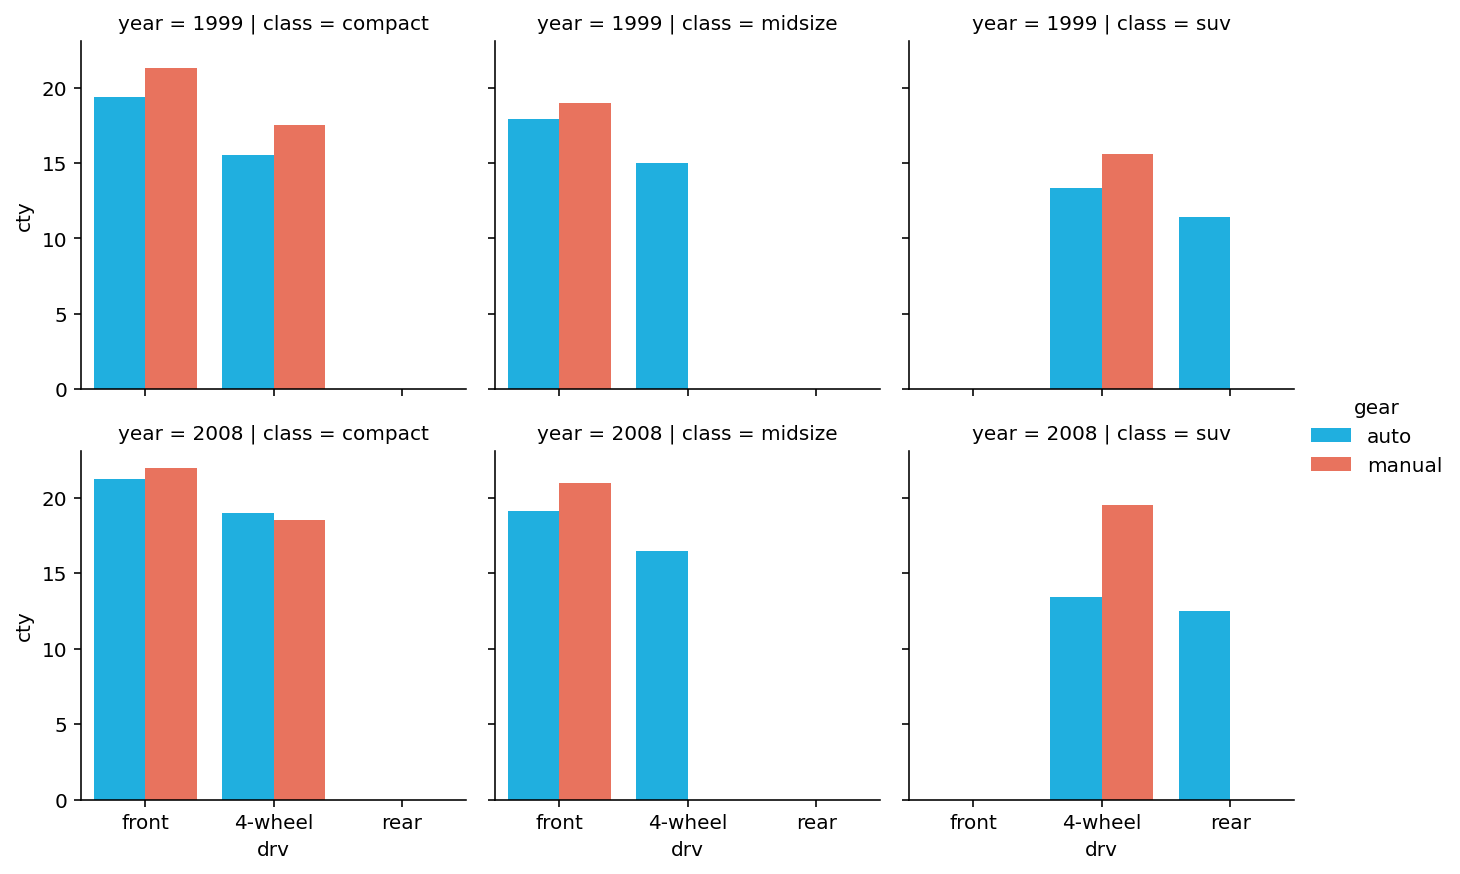

In [13]:
#แสดง class ที่กำหนดในรูปของกราฟ
sns.factorplot(x='drv', y='cty', data=df[df['class'].str.match('compact|suv|midsize')],
               hue='gear', 
               row='year',
               col='class',
               kind='bar',
               ci=None,
               palette=['deepskyblue', 'tomato'],
               height=3, aspect=1);